In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:
mean=np.mean(x_train)
std=np.std(x_train)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

In [17]:
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [19]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
model=Sequential()

In [22]:
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/Users/muskansingh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8830 - loss: 0.3727 - val_accuracy: 0.9630 - val_loss: 0.1167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1096 - val_accuracy: 0.9669 - val_loss: 0.1047
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9759 - loss: 0.0798 - val_accuracy: 0.9652 - val_loss: 0.1196
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9801 - loss: 0.0623 - val_accuracy: 0.9741 - val_loss: 0.0926
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0514 - val_accuracy: 0.9707 - val_loss: 0.0962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0447 - val_accuracy: 0.9735 - val_loss: 0.0928
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0375 - val_accuracy: 0.9751 - val_loss: 0.0873
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0318 - 

In [26]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9770 - loss: 0.1034


In [27]:
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.9779000282287598


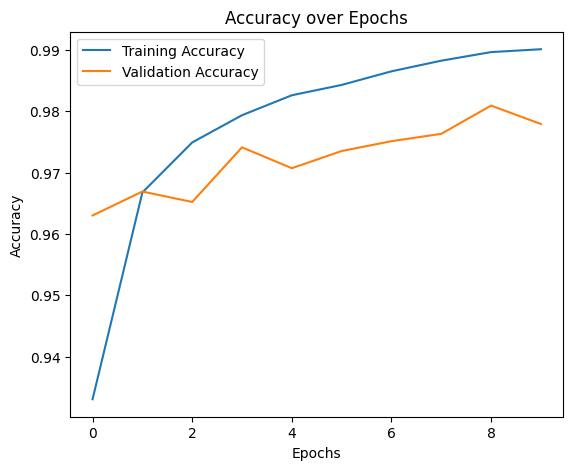

In [28]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

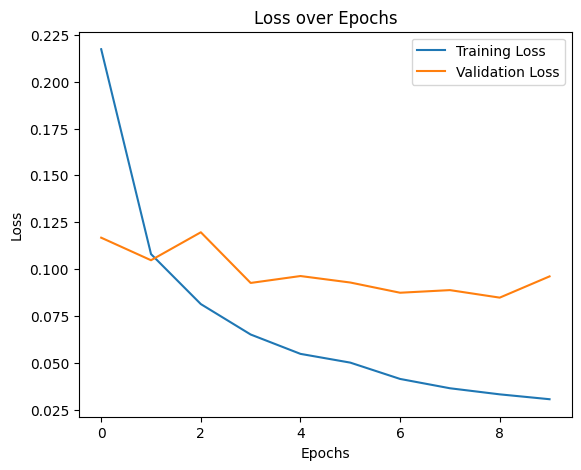

In [29]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()